## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [176]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [177]:
df=pd.read_csv('ab_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [178]:
## get top 5 rows for reference 
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [179]:
print('The number of row of dataset is {}'.format(df.shape[0]))

The number of row of dataset is 294478


c. The number of unique users in the dataset.

In [180]:
print('The number of unique users in the dataset is {}'.format(df.user_id.nunique()))

The number of unique users in the dataset is 290584


d. The proportion of users converted.

In [181]:
print('The proportion of users converted is {:.4f}'.format(df.converted.mean()))

The proportion of users converted is 0.1197


e. The number of times the `new_page` and `treatment` don't match.

In [182]:
df.query('group=="treatment" and landing_page=="old_page" or group=="control" and landing_page=="new_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [183]:
print('No, both the number of times the new_page and treatment don''t match')

No, both the number of times the new_page and treatment dont match


f. Do any of the rows have missing values?

In [184]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [185]:
print('No any missing values in the dataset')

No any missing values in the dataset


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [186]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [187]:
drop_index1 = df2[(df2['group']=='treatment') & (df2['landing_page']=='old_page')].index
drop_index1

Int64Index([   308,    327,    357,    685,    713,    776,    889,   1037,
              1106,   1376,
            ...
            293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917,
            294014, 294252],
           dtype='int64', length=1965)

In [188]:
drop_index2 = df2[(df2['group']=='control') & (df2['landing_page']=='new_page')].index
drop_index2

Int64Index([    22,    240,    490,    846,    850,    988,   1198,   1354,
              1474,   1877,
            ...
            293393, 293480, 293568, 293662, 293888, 293894, 293996, 294200,
            294253, 294331],
           dtype='int64', length=1928)

In [189]:
## drop mismatch rows
drop_index = drop_index1.append(drop_index2)
df2.drop(drop_index,inplace=True)

In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [191]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [192]:
print('unique user_ids are {} in df2'.format(df2.user_id.nunique()))

unique user_ids are 290584 in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [193]:
df2.user_id.value_counts().head(1)


773192    2
Name: user_id, dtype: int64

In [194]:
print('user_id repeated in df2 is {}'.format(df2.user_id.value_counts().head(1).index[0]))

user_id repeated in df2 is 773192


c. What is the row information for the repeat **user_id**? 

In [195]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [196]:
## drop duplicate rows as observed
df2.drop_duplicates(subset='user_id',inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [197]:
total_user= df2.shape[0]
np.sum(df2.converted)/total_user
print('The probability of an individual converting regardless of the page is {:.4f}'.format(np.sum(df2.converted)/total_user))

The probability of an individual converting regardless of the page is 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [198]:
df_ctrl_group = df2.query('group=="control"')
ctrl_group_convert = np.sum(df_ctrl_group.converted==1)/df_ctrl_group.shape[0]
ctrl_group_convert
print('The probability of an individual converting given "control" group is {:.4f}'
      .format(ctrl_group_convert))

The probability of an individual converting given "control" group is 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [199]:
df_treat_group = df2.query('group=="treatment"')
treat_group_convert = np.sum(df_treat_group.converted==1)/df_treat_group.shape[0]
treat_group_convert
print('The probability of an individual converting given "treatment" group is {:.4f}'
      .format(treat_group_convert))

The probability of an individual converting given "treatment" group is 0.1188


d. What is the probability that an individual received the new page?

In [200]:
df2.query('landing_page=="new_page"').user_id.count()/df2.shape[0]
print('The probability that an individual received the new page is {:.4f}'
      .format(df2.query('landing_page=="new_page"').user_id.count()/df2.shape[0]))

The probability that an individual received the new page is 0.5001


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**No, there is no obvious evidence to show that new treatment page leads to more conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Since we assume old page is better than new page, so our Null Hypothesis will assume converted rate of old page is better or equal than new page. Alternative Hypothesis is that new page is better.**


$$H_0:  p_{new} - p_{old} <= 0$$


$$H_1:  p_{new} - p_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [201]:
total_user= df2.shape[0]
p_new_null = np.sum(df2.converted)/total_user
p_new_null
print('the conversion rate for 𝑝𝑛𝑒𝑤 is {:.4f}'.format(p_new_null))

the conversion rate for 𝑝𝑛𝑒𝑤 is 0.1196


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [202]:
## Null hypothesis, assumes both have same converted rate so p_old_null = p_new_null
p_old_null = p_new_null
p_old_null
print('We assumes both have same converted rate so p_old_null = p_new_null = {:.4f}'.format(p_old_null))

We assumes both have same converted rate so p_old_null = p_new_null = 0.1196


c. What is $n_{new}$, the number of individuals in the treatment group?

In [203]:
null_new = df_treat_group.shape[0]
null_new
print('the number of individuals in the treatment group is {}'.format(null_new))

the number of individuals in the treatment group is 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [204]:
null_old = df_ctrl_group.shape[0]
null_old
print('the number of individuals in the control group is {}'.format(null_old))

the number of individuals in the control group is 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [205]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [206]:
new_page_converted = np.random.binomial(1,p_new_null,size=null_new)
new_page_converted

array([1, 0, 0, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [207]:
old_page_converted = np.random.binomial(1,p_old_null,size=null_old)
old_page_converted


array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [208]:
p_new_sample = new_page_converted.mean()
p_new_sample

0.11974399559562315

In [209]:
p_old_sample = old_page_converted.mean()
p_old_sample

0.1192987045169817

In [210]:
p_diffs_sample = p_new_sample - p_old_sample 
p_diffs_sample
print('𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  for my simulated values is {:.6f}'.format(p_diffs_sample))

𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  for my simulated values is 0.000445


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [211]:
from datetime import datetime

a=datetime.now() 


p_diffs = []

for _ in range(10000):
    # new_page sampling
    #bootsamp_newpage = df2.sample(null_new, replace = True)
    bootsamp_newpage = np.random.binomial(1,p_new_null,size=null_new)
    bootsamp_newpage_mean = bootsamp_newpage.mean()
    # old_page sampling
    bootsamp_oldpage = np.random.binomial(1,p_old_null,size=null_old)
    bootsamp_oldpage_mean = bootsamp_oldpage.mean()
    #print(bootsamp_newpage_mean, bootsamp_oldpage_mean)
    # append the info 
    p_diffs.append(bootsamp_newpage_mean-bootsamp_oldpage_mean)
    
b=datetime.now()
print((b-a).seconds)
#plt.hist(p_diffs)


32


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

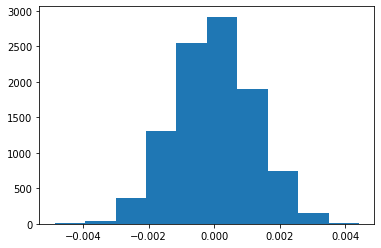

In [212]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [213]:
obs_diffs = treat_group_convert- ctrl_group_convert

np.mean(p_diffs > obs_diffs)

0.903

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In terms of the proportion of the p_diffs are greater than the actual difference observed, named P-value, is 90% far greater than alpha ratio 5%, it means there is no significant difference between new page and old page about converted rate. And we shall not consider to implement new page to increase conversion rate aacording to current evidence**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [214]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page"')['converted'].sum() 
convert_new = df2.query('landing_page=="new_page"')['converted'].sum() 
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]

(convert_old,convert_new,n_old,n_new)

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [215]:
counts = np.array([convert_new,convert_old])
nobs = np.array([n_new,n_old])
stat, pval = sm.stats.proportions_ztest(counts,nobs,alternative='larger')
stat, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Z-score is about -1.31 and the p-value is about 90%. It's still far more than alpha ratio = 5%. So the conclusion is still same as part j.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since it's to predict converted or not-converted as binominal classifier, logistic regresssion is the appropriate model to use**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [216]:
df3 = df2.copy()
df3['intercept'] = 1
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 15.5+ MB


In [217]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [218]:
pd.get_dummies(df3['group'])['treatment']

0         0
1         0
2         1
3         1
4         0
         ..
294473    0
294474    0
294475    0
294476    0
294477    1
Name: treatment, Length: 290584, dtype: uint8

In [219]:
df3['ab_page'] = pd.get_dummies(df3['group'])['treatment']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [220]:
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [221]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:31:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value of ab_page is 0.19. The null hypothesis of logistic model is the coeficient of ab_page is equal to zero and not equal to zero for alternative hypothesis. The result still suggest that there is no significant evidence to prove new page is better than old page regarding conversion rate.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It may help to get other factors into regression model for better explanation of conversion. however, if the factor is highly correlated to current ab_page, it will cause bad effect.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [222]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [223]:
df4 = pd.merge(df3,df_countries)
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [224]:
country_dummy = pd.get_dummies(df4['country'])

In [225]:
df5 = df4.join(country_dummy)
df5.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [226]:
log_mod_2 = sm.Logit(df5['converted'], df5[['intercept', 'ab_page','UK','US']])
results_2 = log_mod_2.fit()
results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 24 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        22:31:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**According to the logistic regression result, the countries don't have any impact to conversion rate. P-value of all the coefficient are more than 5% error rate.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [227]:
df5['interaction_UK'] = df5['ab_page'] * df5['UK']
df5['interaction_US'] = df5['ab_page'] * df5['US']

In [228]:
df5.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,interaction_UK,interaction_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [229]:
log_mod_3 = sm.Logit(df5['converted'], df5[['intercept', 'ab_page','UK','US','interaction_UK','interaction_US']])
results_3 = log_mod_3.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        22:31:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page           -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK                 0.0118      0.040      0.296      0.767      -0.066       0.090
US                 0.0175      0.038      0.465      0.642      -0.056       0.091
interaction_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
interaction_US     0.0469      0.054      0.872      0.383      -0.059       0.152
==================================================================================
"""

**According to the test result, there is no any improvement when I take into interaction factors. The P-value of all coefficient are much far than 5% of error rate.**

## Conclusion

> **According to result of neither AB test nor regression, the p-value of new/old page and user residence are far more than 5% of error rate. We can infer that none of those factors are able to explain whether users convert their account or not. We shall start to explore other factors that are more relevant to user conversion rate** 

In [230]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])